# Vignetting

Create toy model for looking into vignetting issue. Review vignetting paper to double-check how they did it.

In [5]:
import pyrtools as pt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import sfp
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
stim = np.load('../data/stimuli/task-sfprescaled_stimuli.npy')
stim_df = pd.read_csv('../data/stimuli/task-sfprescaled_stim_description.csv')

In [112]:
stim_df[stim_df.class_idx==2].index

Int64Index([16, 17, 18, 19, 20, 21, 22, 23], dtype='int64')

This is how to get the fourier transform of the filter: `anglemasks * himasks * lomasks`.

I'm pretty sure that I shouldn't be up-sampling these, but just padding them; if I up-sampled them, they'd all be the same

should compare the speed of doing the multiplication with the upsampled versions and doing the multiplication with the original (which requires creating the frequency image at different sizes)

In [196]:
tmp = pyr._anglemasks[2][0]*pyr._himasks[2]*pyr._lomasks[1]
tmp_higher = pyr._anglemasks[1][0]*pyr._himasks[1]*pyr._lomasks[0]

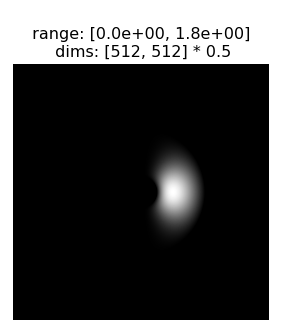

In [199]:
pt.imshow(np.pad(tmp, [(128, 128)], 'constant', constant_values=0), zoom=.5);

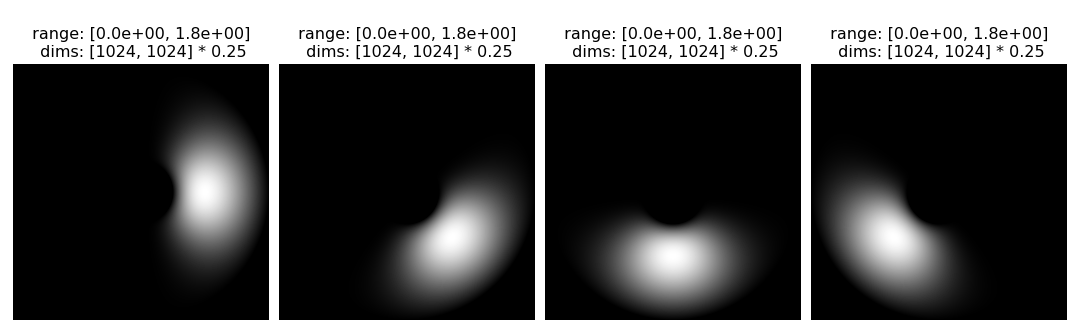

In [183]:
pt.imshow(pyr._anglemasks[0]*pyr._himasks[0]*pyr._lo0mask, zoom=.25);

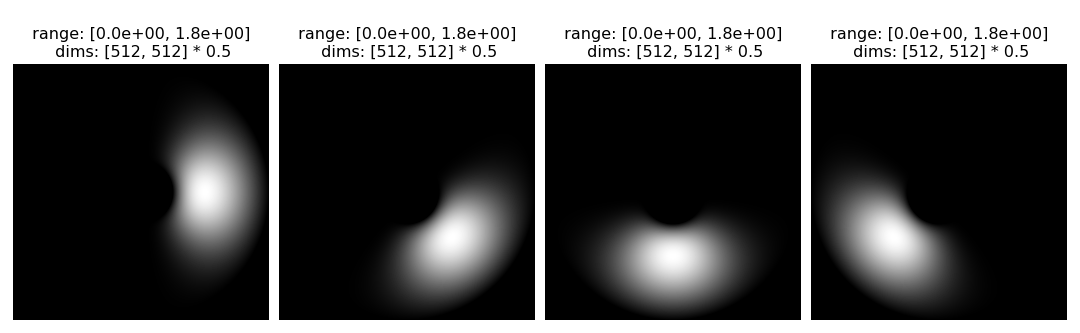

In [181]:
pt.imshow(pyr._anglemasks[1]*pyr._himasks[1]*pyr._lomasks[0], zoom=.5);

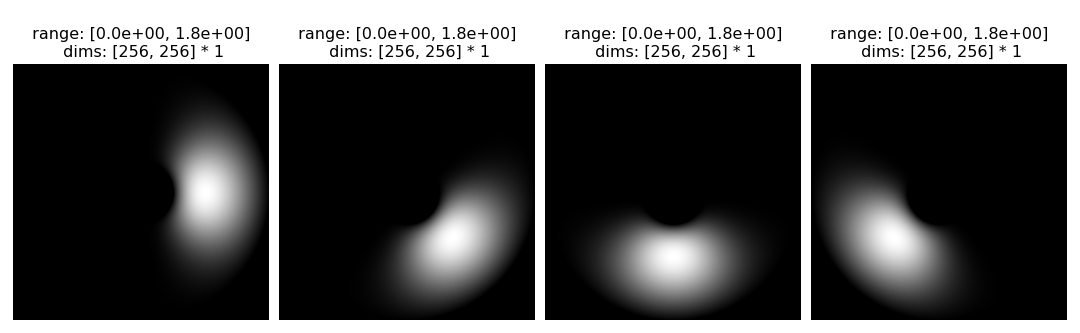

In [182]:
pt.imshow(pyr._anglemasks[2]*pyr._himasks[2]*pyr._lomasks[1], zoom=1);

In [150]:
class_idx = 4
idx = stim_df[stim_df.class_idx==class_idx].index
energy = dict()
energy_fourier = dict()
for i in idx:
    pyr = pt.pyramids.SteerablePyramidFreq(stim[i,28:-28,28:-28], order=3, is_complex=True, twidth=1,)
    for k, v in pyr.pyr_coeffs.items():
        if type(k) != str:
            if k not in energy:
                energy[k] = np.zeros_like(np.abs(v))
            energy[k] += np.abs(v)**2

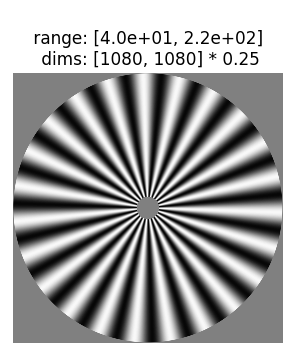

In [128]:
pt.imshow(stim[i], zoom=.25);

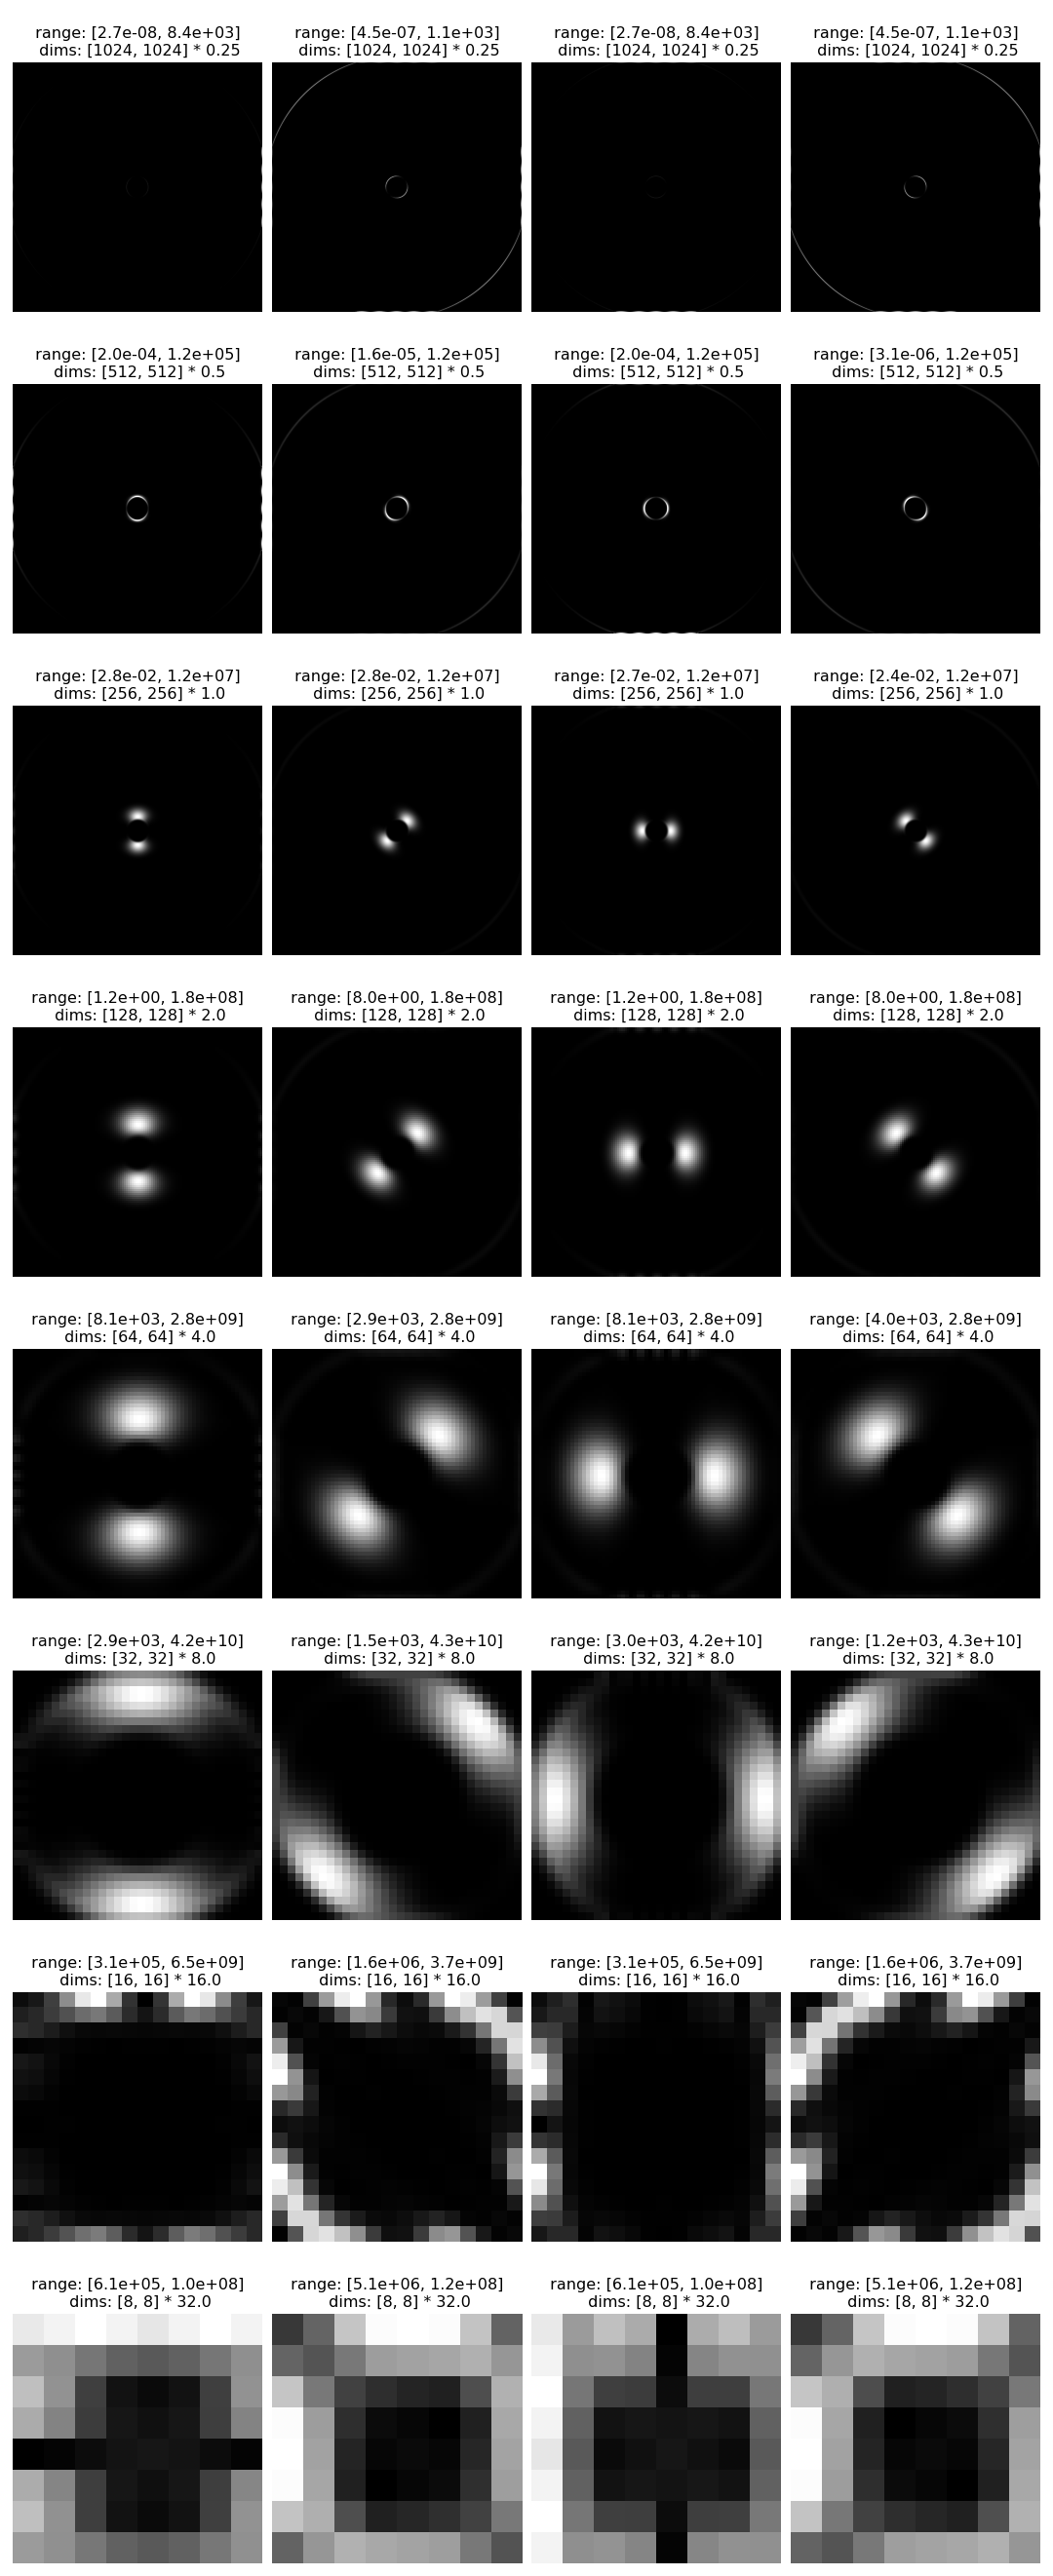

In [149]:
pt.imshow(energy.values(), 'indep1', col_wrap=4, zoom=.25);

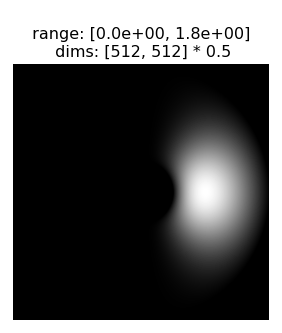

In [268]:
# how to upsample, but note we should only do this for the pyramid coefficient energy
x=np.linspace(-(tmp.shape[0]-1)/2, (tmp.shape[0]-1)/2, num=tmp.shape[0])
y=np.linspace(-(tmp.shape[1]-1)/2, (tmp.shape[1]-1)/2, num=tmp.shape[1])

f = interpolate.interp2d(x,y,tmp)

x=np.linspace(-(tmp.shape[0]-1)/2, (tmp.shape[0]-1)/2, num=2*tmp.shape[0])
y=np.linspace(-(tmp.shape[1]-1)/2, (tmp.shape[1]-1)/2, num=2*tmp.shape[1])

pt.imshow(f(x,y), zoom=.5);